<a href="https://colab.research.google.com/github/roopavenkatraju/Humanactivity/blob/master/Medical_Insurance__Cost__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Insurance Cost Prediction** 


##Introduction

In this project I have applied regression techniques of supervised learning to predict the medical insurance costs.


##About Data 


Dataset consists of 3630 records and 7 attributes. Each record contains the below data for specific person.

age – Age of the person

sex – Sex of the person

bmi – Body Mass Index(BMI) of the person

children – Number of children for the person

smoker – Smoking status of the person

region – Region of the person in US

charges – Medical Insurance costs per year for the person

##Importing Libraries 




In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Train_Data.csv to Train_Data (1).csv


 ## Load the dataset

In [3]:
#load and check the shape 

import io
Train_Data = pd.read_csv(io.BytesIO(uploaded['Train_Data.csv']))


In [4]:
#Train_Data.shape

#check the rows and columns number.
print(f"number of rows:--> {Train_Data.shape[0]} and number of columns:--> {Train_Data.shape[1]}")

number of rows:--> 3630 and number of columns:--> 7


##Meta information about Dataframe

In [5]:
Train_Data.head()

age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900

In [6]:
#check the data information

Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


##check for missing values 

In [7]:
Train_Data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

**No missing values**

##Duplicated rows

In [8]:
#check for dublicated rows
print("Numbers of duplicated rows :",Train_Data.duplicated().sum())

Numbers of duplicated rows : 679


##Statistical information of Dataframe

In [9]:
Train_Data.describe()

age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
max      64.000000    53.130000     5.000000  63770.428010

In [10]:
Train_Data.describe(include=['O'])

sex smoker     region
count   3630   3630       3630
unique     2      2          4
top     male     no  southeast
freq    2029   3070       1021

In [11]:
#check the correlation between dependent column and each of columns
Train_Data.corr()["charges"]

<ipython-input-11-06078243da55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train_Data.corr()["charges"]


age         0.299692
bmi         0.211325
children   -0.075089
charges     1.000000
Name: charges, dtype: float64

## Visulaize the correlation to check multicollinearity

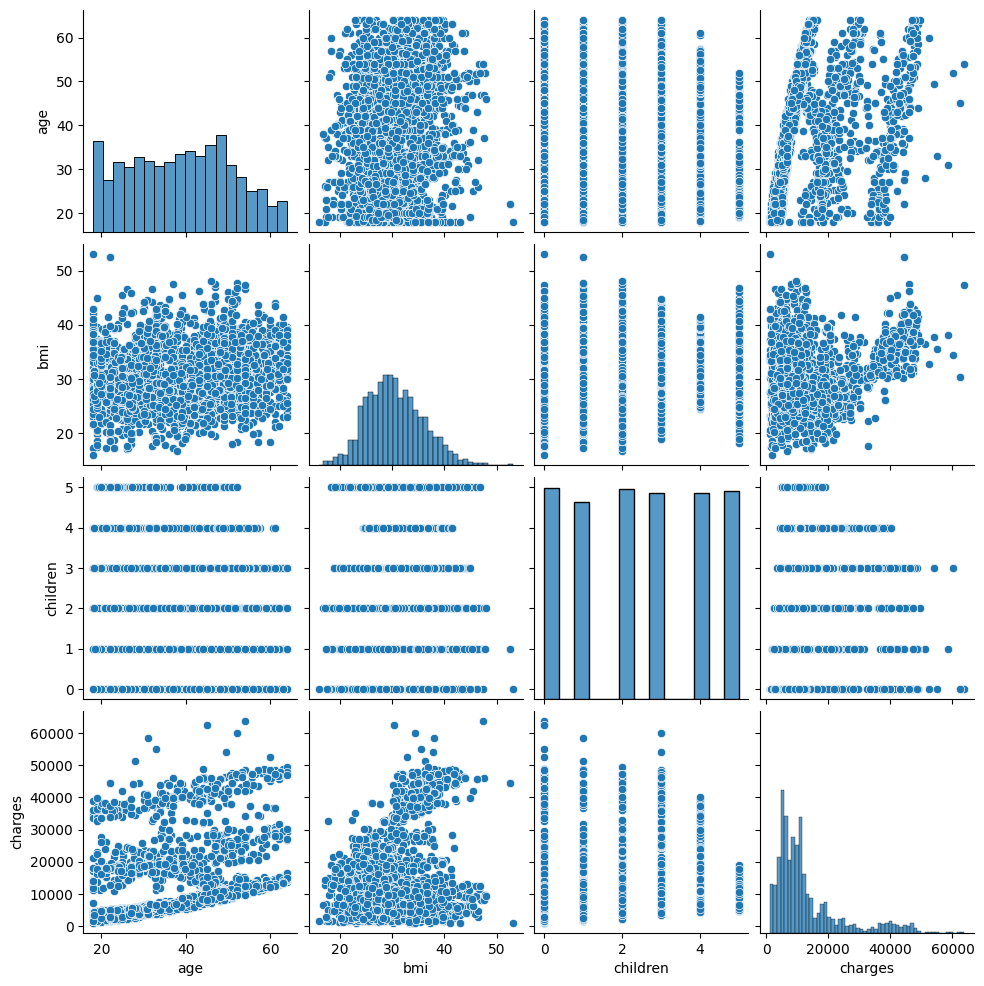

In [12]:
sns.pairplot(Train_Data)

## checking multi collinearity using correlation map

<ipython-input-13-ab6873e3bc42>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_Data.corr(),annot=True,cmap="gist_rainbow",linecolor='black')


<Axes: >

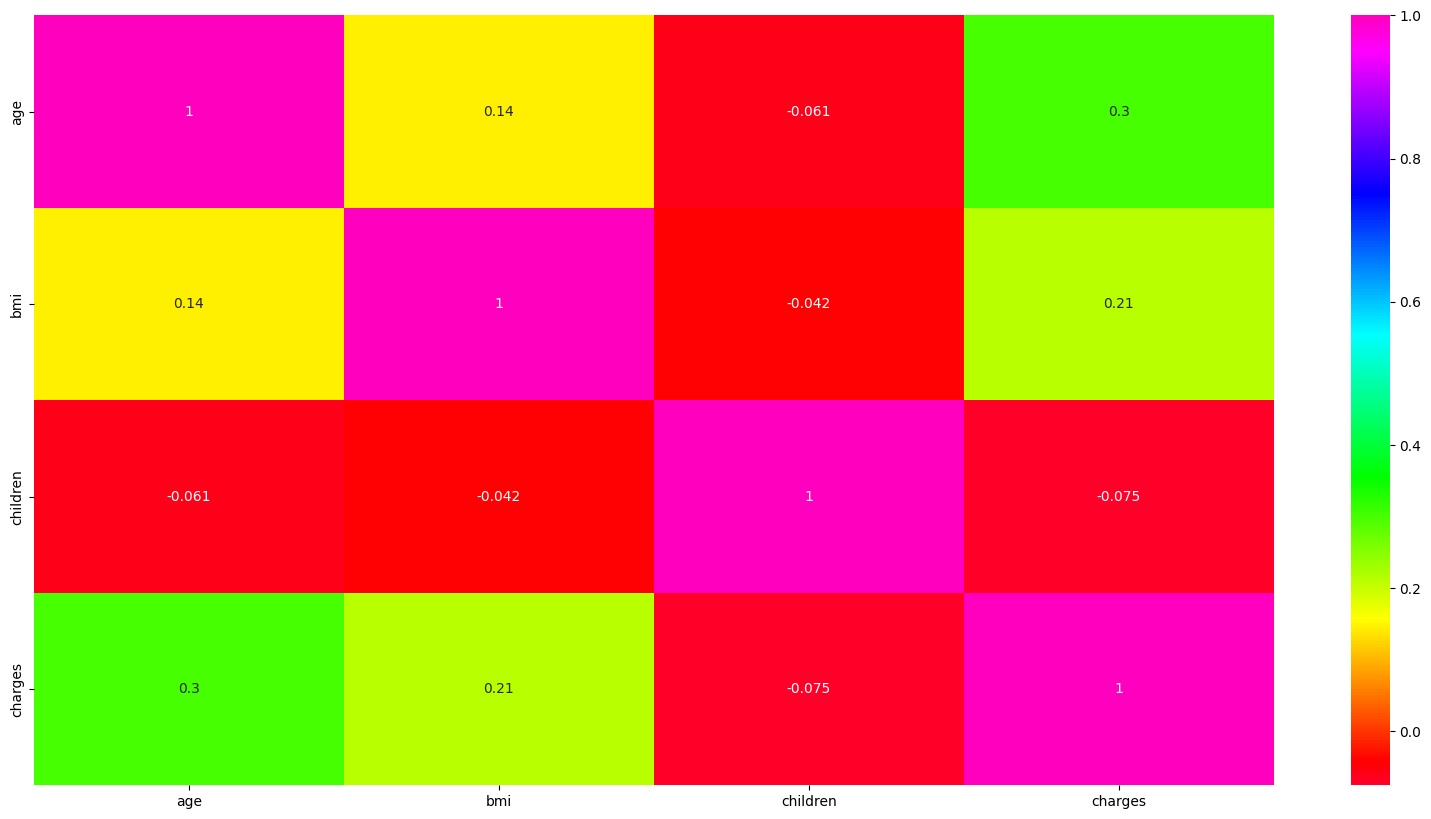

In [13]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(Train_Data.corr(),annot=True,cmap="gist_rainbow",linecolor='black')

No multicolinarity problems

##Exploratory data analysis and visualization

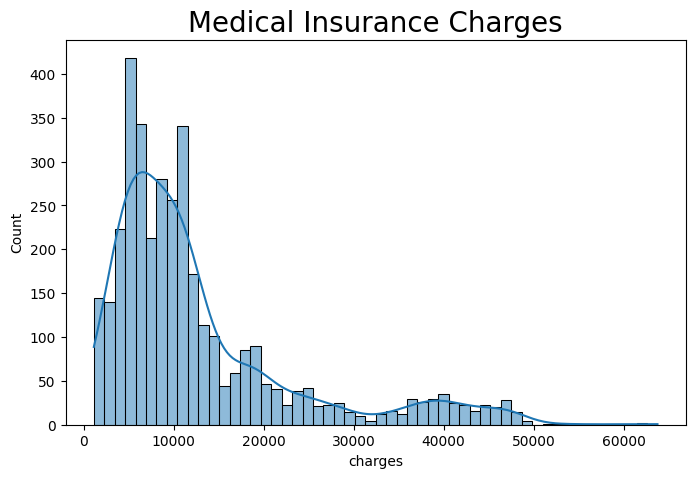

In [14]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(Train_Data['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

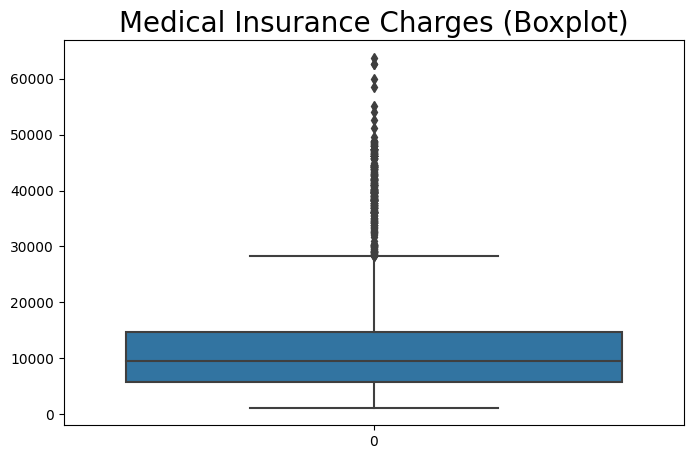

In [15]:
# Boxplot of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.boxplot(Train_Data['charges'])
plt.title('Medical Insurance Charges (Boxplot)', fontsize=20)
plt.show()

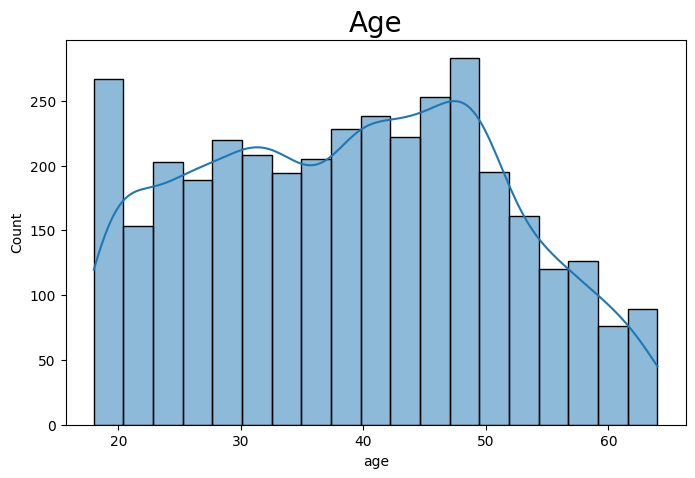

In [16]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(Train_Data['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

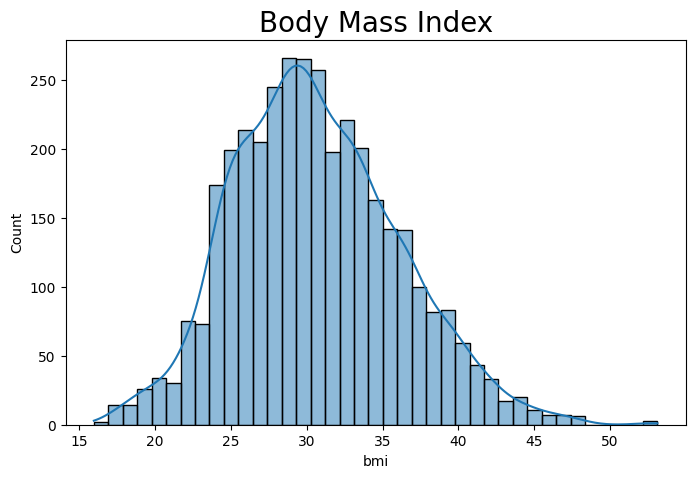

In [17]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(Train_Data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

In [18]:
# Encoding:
Train_Data = pd.get_dummies(Train_Data, drop_first=True)

In [19]:
Train_Data.head(2)

age        bmi  children       charges  sex_male  smoker_yes  \
0  21.000000  25.745000         2   3279.868550         1           0   
1  36.976978  25.744165         3  21454.494239         0           1   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 0  
1                 0                 1                 0

In [20]:
# list of columns
Train_Data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [21]:
# Rearranging columns to see better: 
Train_Data = Train_Data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
Train_Data.columns

Index(['age', 'sex_male', 'smoker_yes', 'bmi', 'children', 'region_northwest',
       'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [22]:
# Splitting Independent & Dependent Feature:
X = Train_Data.iloc[:, :-1]
y = Train_Data.iloc[:, -1]

In [23]:
X.head()

age  sex_male  smoker_yes        bmi  children  region_northwest  \
0  21.000000         1           0  25.745000         2                 0   
1  36.976978         0           1  25.744165         3                 0   
2  18.000000         1           0  30.030000         1                 0   
3  37.000000         1           0  30.676891         3                 0   
4  58.000000         1           0  32.010000         1                 0   

   region_southeast  region_southwest  
0                 0                 0  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 1                 0

In [24]:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64

In [25]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Model Building:

In [26]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7485198191686155
30867003.99451206


In [27]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9100853290872966
11036243.480708076
